# Week 2 lab ― part I

This Jupyter notebook focuses on statistical charts that illustrate the distribution of one variable only, namely:

+ barcharts
+ boxplots
+ histograms
+ log-log plots

# Setup

In [101]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab

In [102]:
%matplotlib inline
plt.style.use('fivethirtyeight')

# Load data

In [103]:
"""
- These charts focus on real-world data concerning
the Appstore

- For further details about the data see this American
Economic Review article: https://www.aeaweb.org/articles?id=10.1257/aer.104.5.255 

- Data are contained in the compressed folder *.zip
"""

# data
df = pd.read_csv('killerAps/data.csv')

# codebook of the variables
cb = pd.read_csv('killerAps/codebook.csv')

# Frequencies

## Data transformation

### Freqs with respect to categories

In [104]:
# collapse data around unique categories
df.loc[:, 'count'] = 1
gr = df.groupby('cat', as_index=False)['count']
fr = pd.DataFrame(gr.aggregate(np.sum))

In [105]:
# set of category names
c = ('Business', 'Education', 'Entertainment', 'Finance', 'Games', 'Health',
     'Lifestyle', 'Medical', 'Music', 'Navigation', 'Photography',
     'Productivity', 'Reference', 'Social Networking', 'Sports', 'Travel',
     'Utilities', 'Weather')

# positions for category
c_pos = fr.index

# data to plot
f = fr['count']

In [106]:
labels = ['a', 'b', 'c']
positions = [0, 1, 2]

In [107]:
dict(zip(labels, positions))

{'a': 0, 'b': 1, 'c': 2}

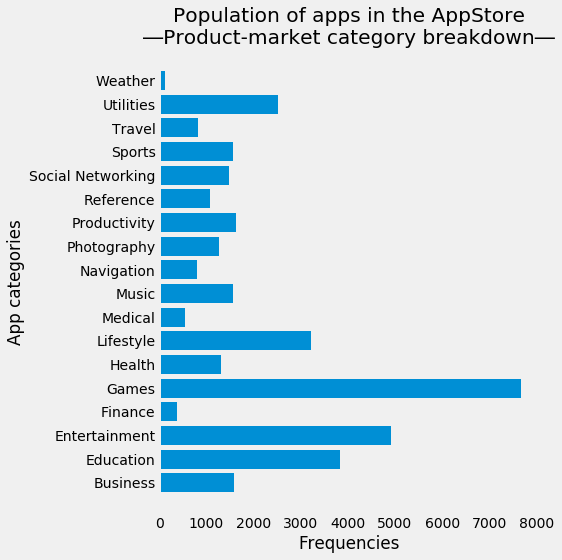

In [108]:
# creating the figure
fig = plt.figure(figsize=(8, 8))

# populate the figure with a plot
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.barh(c_pos, f)

# axes
ax.set_yticks(c_pos)
ax.set_yticklabels(c)

# gridline
ax.grid()

# labels
ax.set_xlabel("Frequencies")
ax.set_ylabel("App categories")

# title
ax.set_title(
    "Population of apps in the AppStore\n―Product-market category breakdown―")

# annotations
# ax.annotate("A simple comment", xy = (1, 90))

# tight layout
fig.tight_layout()

# save the figure
fig.savefig("tight_layout.pdf")

# display the figure
plt.show()

# close the FIG object
plt.close(fig)

### Freqs with respect to sample categories & popularity (killer app or not) 

In [109]:
# collapse data around unique categories of apps
df.loc[:, 'count'] = 1
gr = df.groupby(['cat', 'killerappgros'], as_index=False)['count']
fr = pd.DataFrame(gr.aggregate(np.sum))

In [110]:
# creating the variables to plot

# killer apps
select = ((fr['cat'] == 9) | (fr['cat'] == 11)) & (fr['killerappgros'] == 1)
killer = fr.loc[select, 'count'].values

# non killer apps
select = ((fr['cat'] == 9) | (fr['cat'] == 11)) & (fr['killerappgros'] == 0)
non_killer = fr.loc[select, 'count'].values

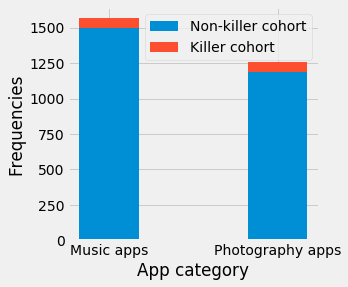

In [111]:
# params for the visualization
c_n = 2
c_pos = np.arange(c_n)    # the x locations for the groups
width = 0.35              # the width of the bars: can also be len(x) sequence

# creating framework for the figure
fig = plt.figure(figsize=(4, 4))

# populate the figure
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.bar(c_pos, non_killer, width, label='Non-killer cohort')
ax.bar(c_pos, killer, width, bottom=non_killer,  label='Killer cohort')

# axes labels
ax.set_xlabel('App category')
ax.set_ylabel('Frequencies')

# axes ticks
ax.set_xticks((0, 1))
ax.set_xticklabels(('Music apps', 'Photography apps'))

# legend
ax.legend(loc='best')

plt.show()

# Univariate distributions

## Boxplots

In [112]:
# data series
x = df.numcomapp

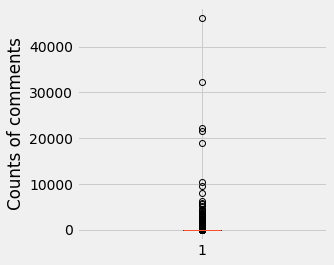

In [113]:
# figure
fig = plt.figure(figsize=(4, 4))

# plot
ax = fig.add_subplot(111)

# plot the data
ax.boxplot(x)

# xtick labels
# ax.set_xticklabels('Average price')

# labels
ax.set_ylabel('Counts of comments')

# axhline
# ax.axhline(y = 10, color = 'orange')

# display the plot
plt.show()

# close the figure
plt.close(fig)

## Histograms

In [114]:
# data series
x = df.numcomapp

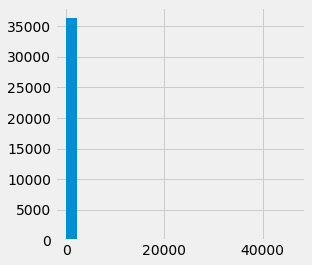

In [115]:
# creating a new figure
fig = plt.figure(figsize=(4, 4))

# populate the figure with a plot
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.hist(x, bins=20)

# display the plot
plt.show()

# close the figure
plt.close(fig)

## Log-log plots

In [116]:
# data preparation
gr = df.groupby('numcomapp', as_index=False)['count']
ll = gr.aggregate(np.sum)
ll.loc[:, 'pr'] = ll['count'] / np.sum(ll['count']) 
ll.loc[:, 'numcomapp'] = ll['numcomapp'] + 1

In [117]:
# create data series
x = ll['numcomapp']
y = ll['pr']

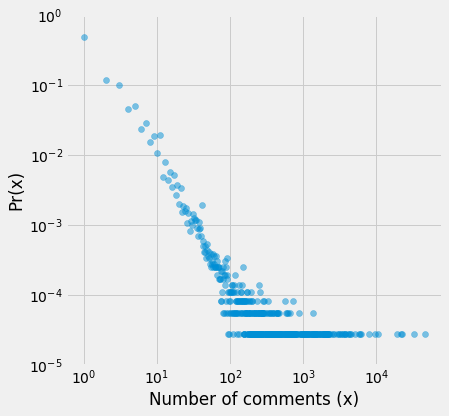

In [118]:
'''
The distribution of 'comments' in the Appstore is so skewed that 
neither the boxplot nor the histogram can reveal any meaningful 
pattern. The log-log plot is particularly suited to deal with 
phenomena that follows a powerlaw distribution (in the context of
SMM638, we will frequently ecnounter this distribution).

Baiscally, the log-log plot has two distinctive features:

- the x-axis is log-transformed (this helps to appreciate the 
  range of variability of the variable under investigation)
- the y-axis reports probability scores (i.e., the chance that a 
  unit randomly selected from the population will present the value 𝑥̂ 

)
'''

# cretae the chart
fig = plt.figure(figsize=(6, 6))

# populate the figure
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.scatter(x, y, marker='o', alpha=0.5)

# axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.00001, 1)
ax.set_xlabel('Number of comments (x)')
ax.set_ylabel('Pr(x)')

# show the plot
plt.show()